In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

%matplotlib inline

In [2]:
train = pd.read_csv('housing_price_train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
per = train.isnull().sum()/len(train)*100
per_missing = pd.DataFrame({'Percentage':per.sort_values(ascending=False)})
per_missing[per_missing['Percentage']>20]

,Percentage
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text xticklabel objects>)

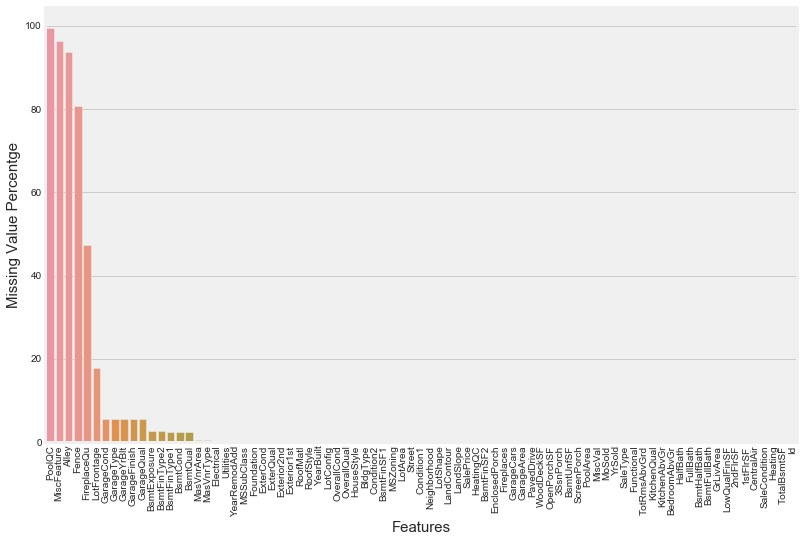

In [7]:
plt.subplots(figsize=(12, 8))
sns.barplot(x=per_missing.index,y=per_missing['Percentage'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Missing Value Percentge',fontsize=15)
plt.xticks(rotation=90)

In [8]:
train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

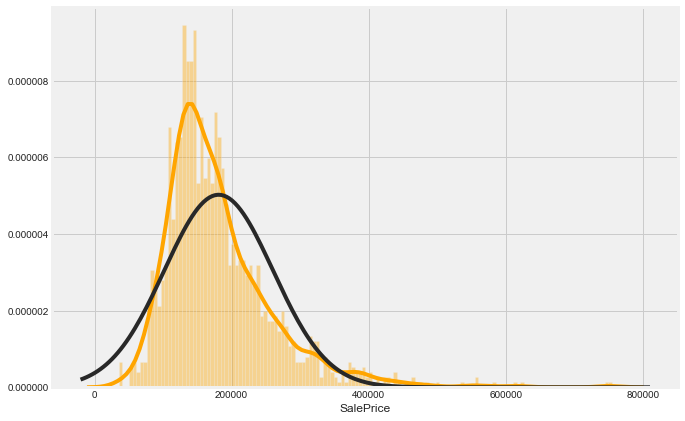

In [10]:
plt.figure(figsize=(10,7))
sns.distplot(train['SalePrice'],bins=140,fit=norm,color='orange')

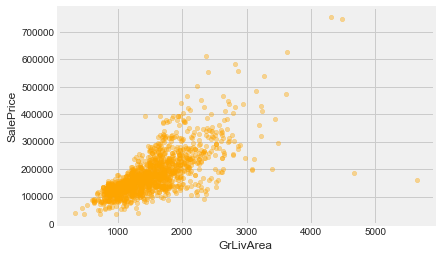

In [11]:
train.plot.scatter(x='GrLivArea', y='SalePrice',alpha=0.4,c='orange')

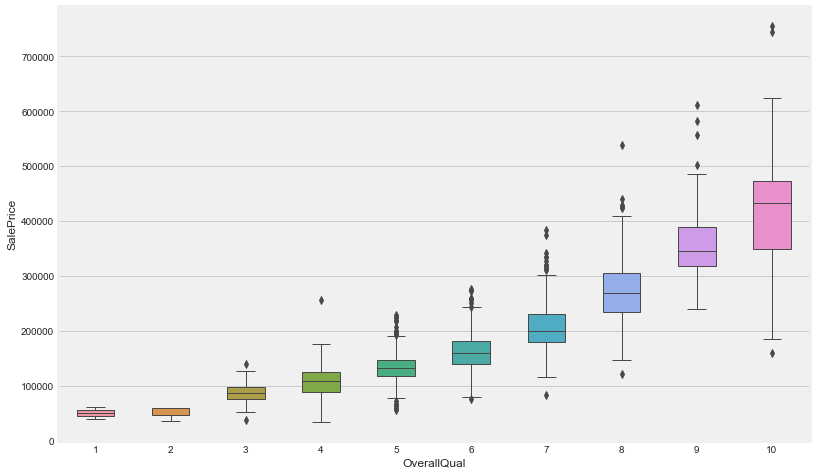

In [12]:
plt.figure(figsize=(12,8))
fig = sns.boxplot(x='OverallQual', y='SalePrice', width = 0.5, linewidth=1,data=train)

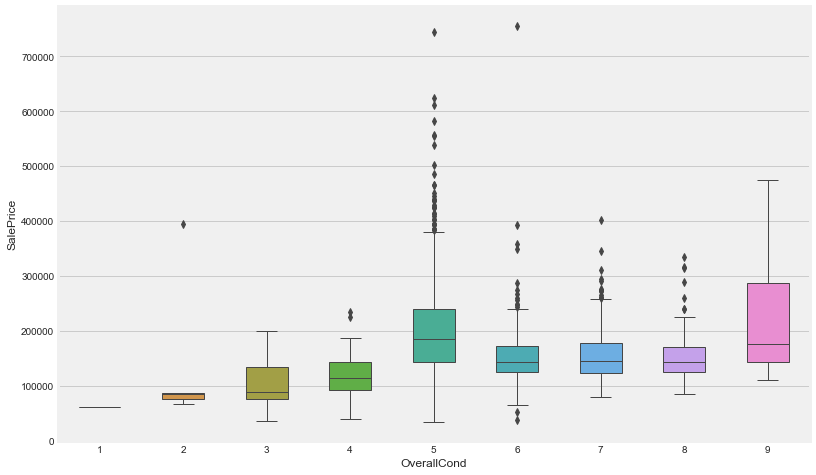

In [13]:
plt.figure(figsize=(12,8))
fig = sns.boxplot(x='OverallCond', y='SalePrice', width = 0.5, linewidth=1,data=train)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

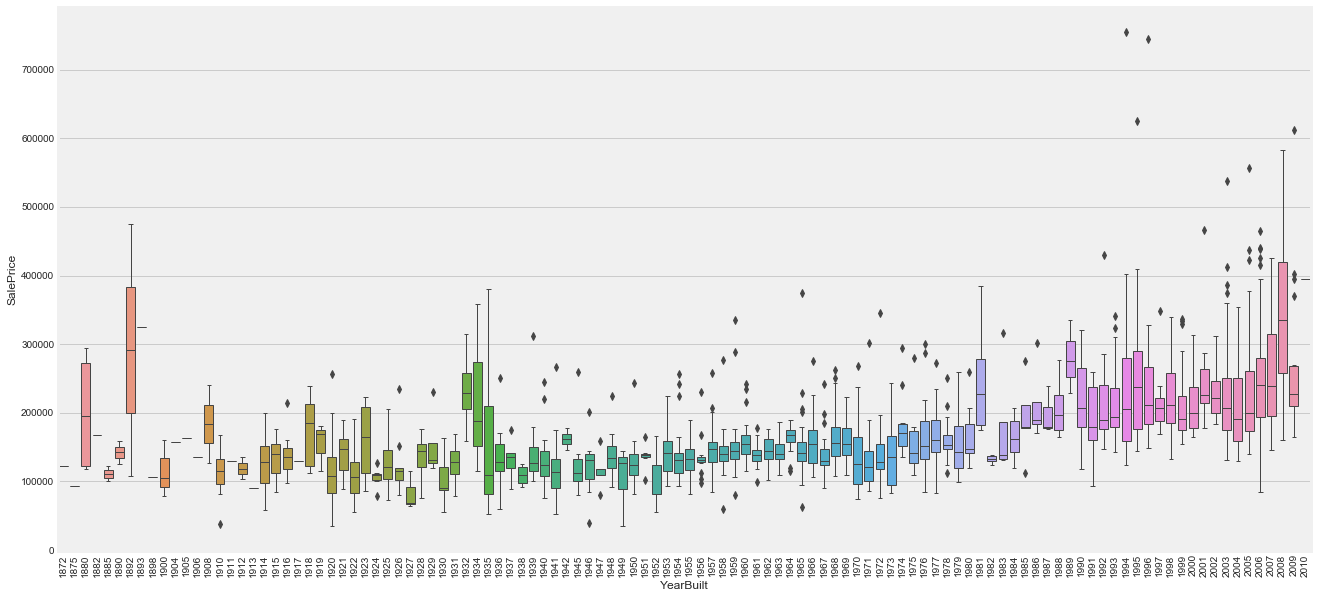

In [14]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', linewidth=1, data=train)
plt.xticks(rotation=90)

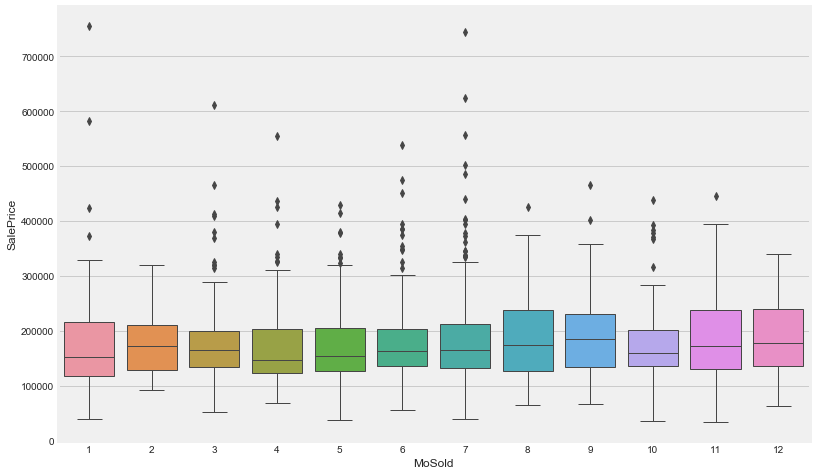

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(x='MoSold', y='SalePrice', linewidth=1,data=train)

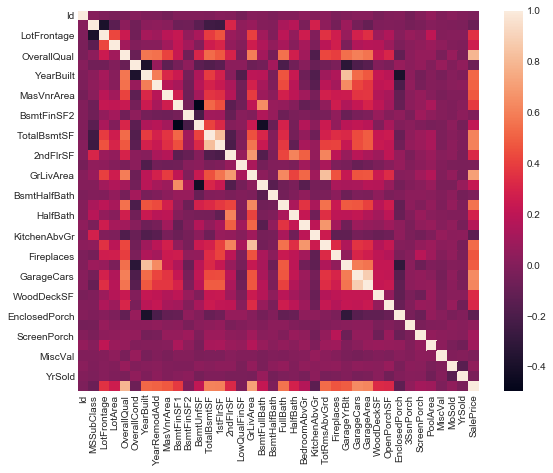

In [16]:
plt.figure(figsize=(8,7))
sns.heatmap(train.corr())

In [17]:
cor = train.corr()
top_cor = abs(cor['SalePrice']).sort_values(ascending=False).head(15)
top_cor

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

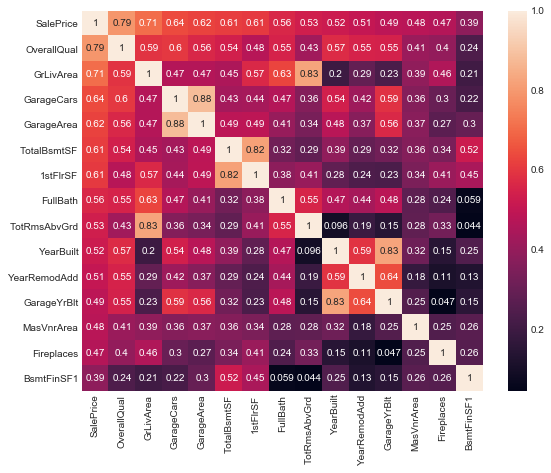

In [18]:
plt.figure(figsize=(8,7))
sns.heatmap(train[top_cor.index].corr(),annot=True)

In [19]:
OverallQual: Overall material and finish quality
GrLivArea: Above grade (ground) living area square feet
GarageCars: Size of garage in car capacity
TotalBsmtSF: Total square feet of basement area
1stFlrSF: First Floor square feet
FullBath: Full bathrooms above grade
TotRmsAbvGrd
    


SyntaxError: invalid syntax (<ipython-input-19-e5fdf2dbc713>, line 1)

In [ ]:
#GarageCars and GarageArea are duplicated.
#TotRmsAbvGrd and GrLivArea are duplicated.
numerical data selection: 
OverallQual GrLivArea GarageCars TotalBsmtSF FullBath YearBuilt

In [20]:
#House Age(bad)
train['SoldAge']=train['YrSold']-train['YearBuilt']
train['SalePrice'].corr(train['SoldAge'])

-0.5233504175468161

In [21]:
train['YearBuilt'].corr(train['SoldAge'])

-0.9990359444033196

In [22]:
#Total Area(good)
train['TotalArea']=train['GrLivArea']+train['TotalBsmtSF']
train['SalePrice'].corr(train['TotalArea'])

0.7789588289942263

In [23]:
#TatalSF(good)
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train['SalePrice'].corr(train['TotalSF'])

0.7822600527979845

In [24]:
#Total Baths(good)
train['TotalBaths']=train['BsmtFullBath']+train['BsmtHalfBath']+train['FullBath']+train['HalfBath']
train['SalePrice'].corr(train['TotalBaths'])

0.6130046086468921

In [25]:
cor1=train.corr()
top_cor1 = abs(cor1['SalePrice']).sort_values(ascending=False).head(15)
top_cor1

SalePrice       1.000000
OverallQual     0.790982
TotalSF         0.782260
TotalArea       0.778959
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
TotalBaths      0.613005
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
SoldAge         0.523350
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [ ]:
#['OverallQual','TotalSF','GarageCars','TotalBaths']

In [26]:
#The check categorical variables
object_value = train.select_dtypes(include=['object'])
object_value.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [44]:
missing_value=train.isnull().sum()
check = pd.DataFrame({'missing':missing_value.sort_values(ascending=False)})
check[check['missing']!=0]

,missing
LotFrontage,259
GarageFinish,81
GarageCond,81
GarageYrBlt,81
GarageQual,81
GarageType,81
BsmtFinType2,38
BsmtExposure,38
BsmtCond,37
BsmtQual,37


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

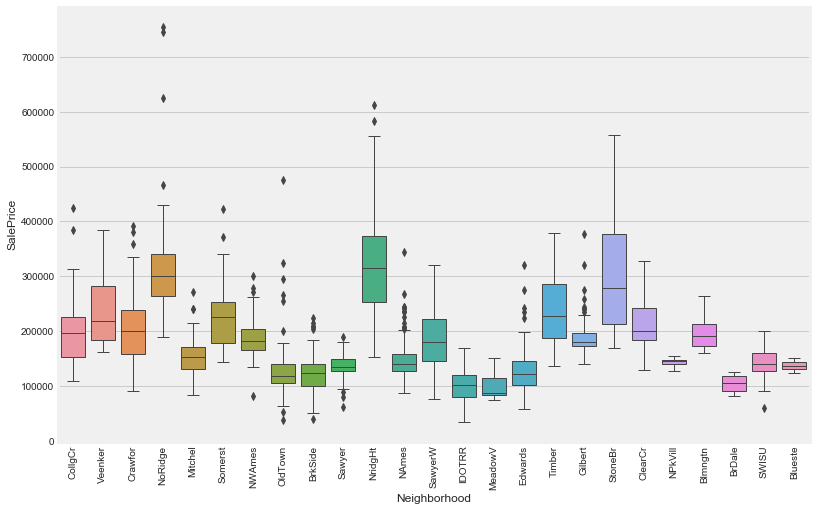

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Neighborhood', y='SalePrice', linewidth=1,data=train)
plt.xticks(rotation=90)

In [56]:
train[['MSZoning', 'SalePrice']].groupby('MSZoning', as_index = False).mean().sort_values(by='SalePrice',ascending=False)

,MSZoning,SalePrice
1,FV,214014.061538
3,RL,191004.994787
2,RH,131558.375000
4,RM,126316.830275
0,C (all),74528.000000


In [58]:
train[['GarageQual', 'SalePrice']].groupby('GarageQual', as_index = False).mean().sort_values(by='SalePrice',ascending=False)

,GarageQual,SalePrice
0,Ex,241000.000000
2,Gd,215860.714286
4,TA,187489.836003
1,Fa,123573.354167
3,Po,100166.666667


In [59]:
train[['Utilities', 'SalePrice']].groupby('Utilities', as_index = False).mean().sort_values(by='SalePrice',ascending=False)

,Utilities,SalePrice
0,AllPub,180950.95682
1,NoSeWa,137500.00000


In [ ]:
#Use
#MSZoning GarageQual
#Delete 
#Utilities
